In [2]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import sklearn.metrics as metrics
import pandas as pd
import numpy as np
import sklearn
import random
import matplotlib
import seaborn as sns
from matplotlib import pyplot as plt

## Reading data

#### Tongji hospital

In [135]:
Tongji_375_data = pd.read_csv("data/Tongji_375_CN.csv")

In [136]:
Tongji_375_data = Tongji_375_data.dropna()

In [137]:
y_tongji = np.array(Tongji_375_data['outcome'])
X_tongji = Tongji_375_data.drop(['id', 'admission', 'discharge', 'LDH_first', 'hsCRP_first', 'lymphocytes_first', 'outcome'], axis = 1)

#### Remaining hospitals

In [138]:
Tongji_110_data = pd.read_csv("data/Tongji_110_CN.csv")
St_Antonius_data = pd.read_csv("data/St_Antonius_NL.csv")
Outcomerea_FR_data = pd.read_csv("data/Outcomerea_FR.csv")
Northwell_US_data = pd.read_csv("data/Northwell_US.csv")

In [139]:
Northwell_US_data = Northwell_US_data.loc[random.sample(range(0,1038), 500),:]

In [140]:
combined_data = pd.concat([Tongji_375_data, Tongji_110_data,
                           St_Antonius_data, Outcomerea_FR_data,
                           Northwell_US_data]).reset_index()

In [141]:
combined_data = combined_data.drop(['admission', 'discharge'], axis=1).dropna()

In [142]:
y_combined = np.array(combined_data['outcome'])
X_combined = combined_data.drop(['id','index', 'LDH_first', 'hsCRP_first', 'lymphocytes_first', 'outcome'], axis = 1)

#### Hospitals without Tongji

In [193]:
data_without_tongji = pd.concat([St_Antonius_data, Outcomerea_FR_data,
                           Northwell_US_data]).reset_index()

In [194]:
data_without_tongji = data_without_tongji.drop(['admission', 'discharge'], axis=1).dropna()

In [195]:
y_w_t = np.array(data_without_tongji['outcome'])
X_w_t = data_without_tongji.drop(['id','index', 'LDH_first', 'hsCRP_first', 'lymphocytes_first', 'outcome'], axis = 1)

### Defining functions

In [241]:
def svm_testing(X,y, text):
    svm = SVC()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    svm.fit(X_train, y_train)
    y_test_score = svm.decision_function(X_test)
    y_train_score = svm.decision_function(X_train)
    X_train_val=pd.concat((X_train,X_test))
    y_train_val=np.concatenate((y_train,y_test), axis=0)
    train_fpr, train_tpr, tr_thresholds = metrics.roc_curve(y_train, y_train_score)
    test_fpr, test_tpr, te_thresholds = metrics.roc_curve(y_test, y_test_score)
    #Drawing ROC curve
    plt.grid()
    plt.plot(train_fpr,train_tpr, label = "Train ROC")
    plt.plot(test_fpr,test_tpr, label = "Test ROC")
    plt.legend()
    plt.title("ROC plot for %s"%text)
    plt.xlabel("True positive")
    plt.ylabel("False positive")
    plt.rcParams["figure.figsize"] = (10,10)
    print("AUC for train ROC is %s"%metrics.auc(train_fpr, train_tpr))
    print("AUC for test ROC is %s"%metrics.auc(test_fpr, test_tpr))
    
    fig = metrics.plot_confusion_matrix(svm,X_test,y_test,display_labels=['Survived', 'Died'],
                                 cmap=plt.cm.Blues)
    fig.ax_.set_title("Confusion matrix for %s" %text)
    
    #Crossvalidations
    cross_acc = cross_val_score(svm, X_train_val, y_train_val, scoring='accuracy', cv = 20)
    cross_pre = cross_val_score(svm, X_train_val, y_train_val, scoring='precision', cv = 20)
    cross = pd.DataFrame({'Accuracy' : cross_acc,
                          'Precision' : cross_pre})
    cross = pd.melt(cross)
    return cross
    

## SVM testing for Tongji hospital

AUC for train ROC is 0.9914742212674543
AUC for test ROC is 0.9841327082582041


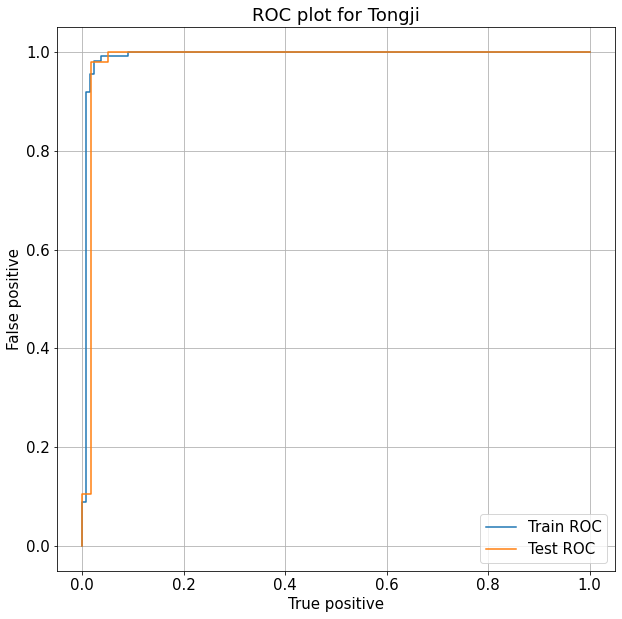

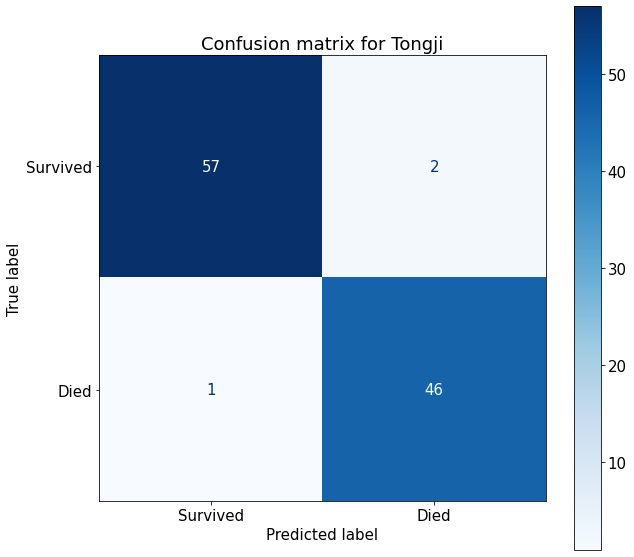

In [242]:
cross_tongji = svm_testing(X_tongji,y_tongji, "Tongji")

## SVM testing for combined data

AUC for train ROC is 0.8809810944371401
AUC for test ROC is 0.8649344341913551


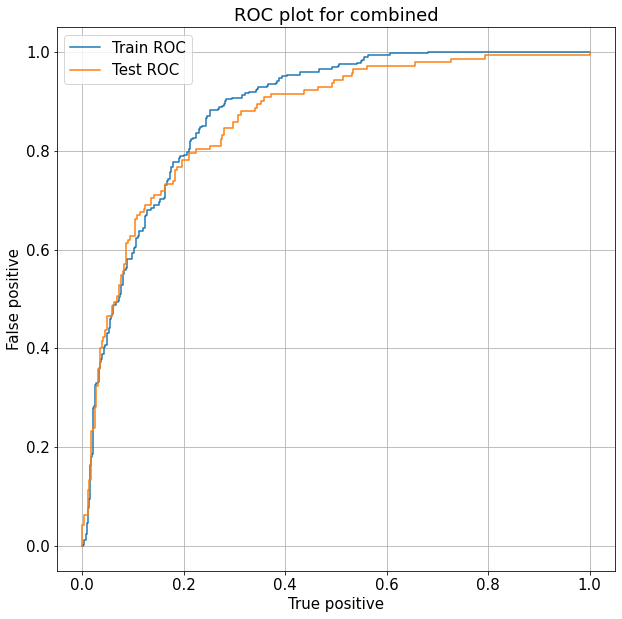

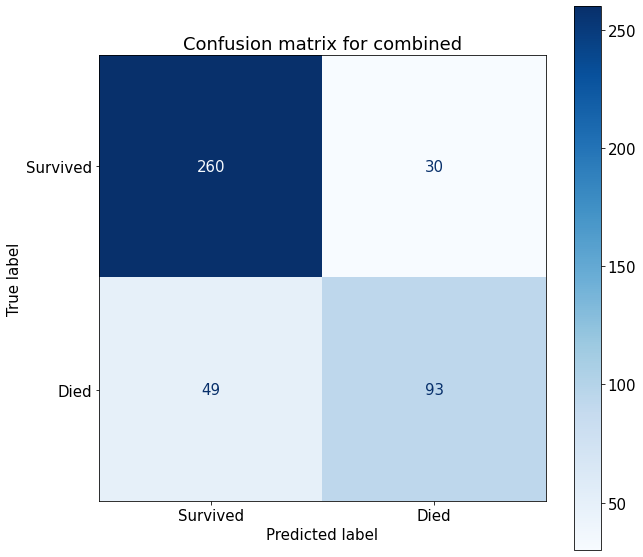

In [243]:
cross_combined = svm_testing(X_combined,y_combined, "combined")

# SVM testing for data without Tongji

AUC for train ROC is 0.802991834910834
AUC for test ROC is 0.7996422182468693


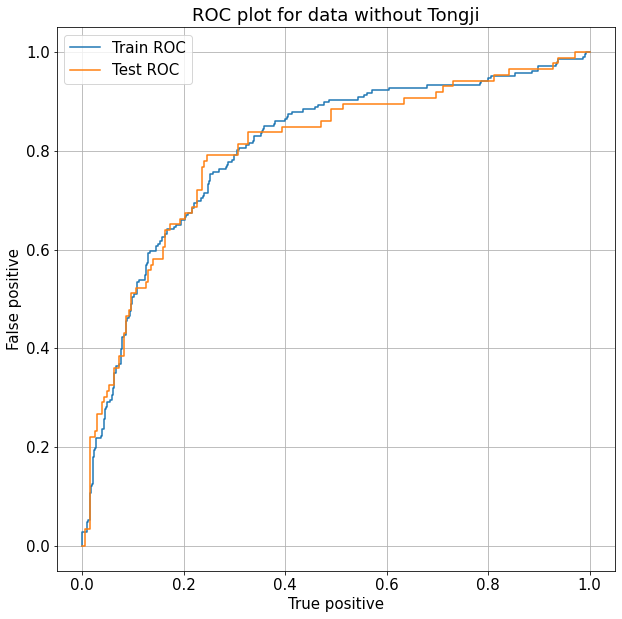

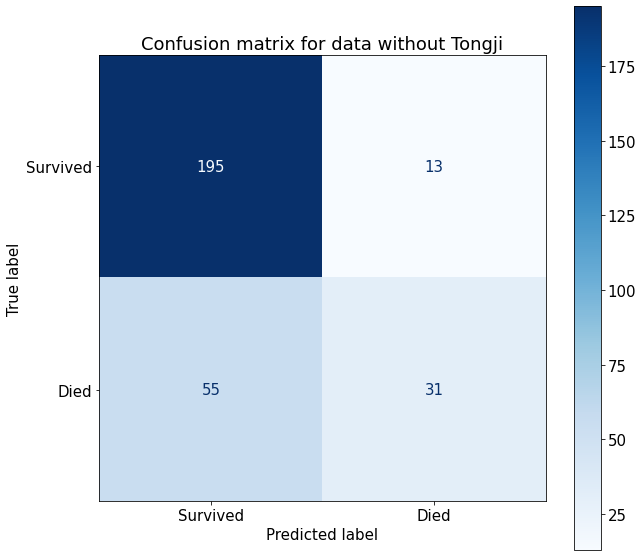

In [244]:
cross_w_t = svm_testing(X_w_t,y_w_t, "data without Tongji")

In [211]:
cross_tongji['type'] = ['Tongji'] * 40
cross_combined['type'] = ['Combined'] * 40
cross_w_t['type'] = ['Excluding_Tongji'] * 40

In [212]:
crossvalidations = pd.concat((cross_tongji,cross_combined,cross_w_t))
crossvalidations = crossvalidations.rename(columns={'variable':'Scoring'})

In [1]:
ax = sns.boxplot(data = crossvalidations, 
                 x = crossvalidations.type, y = crossvalidations.value, hue = crossvalidations.Scoring
                  )
ax.set(ylim = (0,1.1))
matplotlib.rcParams['figure.figsize'] = [10,12]
matplotlib.rcParams.update({'font.size': 15})
plt.title("Scoring comparison")
plt.ylabel("Validaton value")
plt.xlabel("")

plt.show()

NameError: name 'sns' is not defined